In [3]:
%matplotlib inline

import gym
import itertools
import matplotlib
import numpy as np
import pandas as pd
import sys

if "../" not in sys.path:
    sys.path.append("../") 

from collections import defaultdict
from lib.envs.cliff_walking import CliffWalkingEnv
from lib import plotting

matplotlib.style.use('ggplot')

In [4]:
env = CliffWalkingEnv()

In [2]:
def make_epsilon_greedy_policy(Q, epsilon, nA):
    """
    Creates an epsilon-greedy policy based on a given Q-function and epsilon.
    
    Args:
        Q: A dictionary that maps from state -> action-values.
            Each value is a numpy array of length nA (see below)
        epsilon: The probability to select a random action. Float between 0 and 1.
        nA: Number of actions in the environment.
    
    Returns:
        A function that takes the observation as an argument and returns
        the probabilities for each action in the form of a numpy array of length nA.
    
    """
    def policy_fn(observation):
        A = np.ones(nA, dtype=float) * epsilon / nA
        best_action = np.argmax(Q[observation])
        A[best_action] += (1.0 - epsilon)
        return A
    return policy_fn

In [21]:
def q_learning(env, num_episodes, discount_factor=1.0, alpha=0.5, epsilon=0.1):
    """
    Q-Learning algorithm: Off-policy TD control. Finds the optimal greedy policy
    while following an epsilon-greedy policy
    
    Args:
        env: OpenAI environment.
        num_episodes: Number of episodes to run for.
        discount_factor: Gamma discount factor.
        alpha: TD learning rate.
        epsilon: Chance to sample a random action. Float between 0 and 1.
    
    Returns:
        A tuple (Q, episode_lengths).
        Q is the optimal action-value function, a dictionary mapping state -> action values.
        stats is an EpisodeStats object with two numpy arrays for episode_lengths and episode_rewards.
    """
    
    # The final action-value function.
    # A nested dictionary that maps state -> (action -> action-value).
    Q = defaultdict(lambda: np.zeros(env.action_space.n))

    # Keeps track of useful statistics
    stats = plotting.EpisodeStats(
        episode_lengths=np.zeros(num_episodes),
        episode_rewards=np.zeros(num_episodes))    
    
    # The policy we're following
    policy = make_epsilon_greedy_policy(Q, epsilon, env.action_space.n)
    
    for i_episode in range(num_episodes):
        # Print out which episode we're on, useful for debugging.
        if (i_episode + 1) % 100 == 0:
            #print("\rEpisode {}/{}.".format(i_episode + 1, num_episodes), end="")
            #sys.stdout.flush()
            print("\r{}".format(i_episode+1), end="", flush = True)
            #sys.stdout.flush()
        # Implement this!
        state = env.reset()
        
        for t in itertools.count():
            action_probs = policy(state)
            action = np.random.choice(np.arange(len(action_probs)), p = action_probs)
            
            next_state, reward, done, _ = env.step(action)
            
            stats.episode_lengths[i_episode] = t
            stats.episode_rewards[i_episode] += reward
            
            best_next_a = np.argmax(Q[next_state])
            
            Q[state][action] += alpha * (reward + discount_factor * Q[next_state][best_next_a] - Q[state][action])
            
            if done:
                break
            
            state = next_state
            
    return Q, stats

In [22]:
Q, stats = q_learning(env, 500)

500

In [27]:
Q

defaultdict(<function __main__.q_learning.<locals>.<lambda>()>,
            {36: array([-13.        , -99.99999404, -13.99994823, -13.99958537]),
             24: array([-13.53411652, -12.        , -13.98515367, -12.99997865]),
             12: array([-12.74009618, -12.77931837, -12.76087766, -13.        ]),
             0: array([-12.25191185, -12.28897507, -12.23371483, -12.5       ]),
             1: array([-11.89789984, -11.65612853, -11.65789827, -11.69583563]),
             2: array([-10.98834991, -10.9354214 , -10.88376964, -11.01999234]),
             3: array([-10.20389257, -10.14584961, -10.24511559, -10.13628001]),
             4: array([-9.33460903, -9.23100274, -9.62120362, -9.39966642]),
             5: array([-8.3125    , -8.39028347, -8.40405192, -8.7470849 ]),
             17: array([-8.09482916, -7.99866013, -7.99856474, -8.50148622]),
             18: array([-7.50397915, -6.99945397, -6.99943788, -8.12473434]),
             19: array([-6.01619625, -5.99979537, -5.999

In [28]:
env.render()

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  x  C  C  C  T



In [31]:
state = env.reset()

while True:
    
    action = np.argmax(Q[state])
    next_state, reward, done, _ = env.step(action)
    if done:
        break
    state = next_state
    env.render()
env.render()

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  x  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  x  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  x  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  x  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  x  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  x  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o

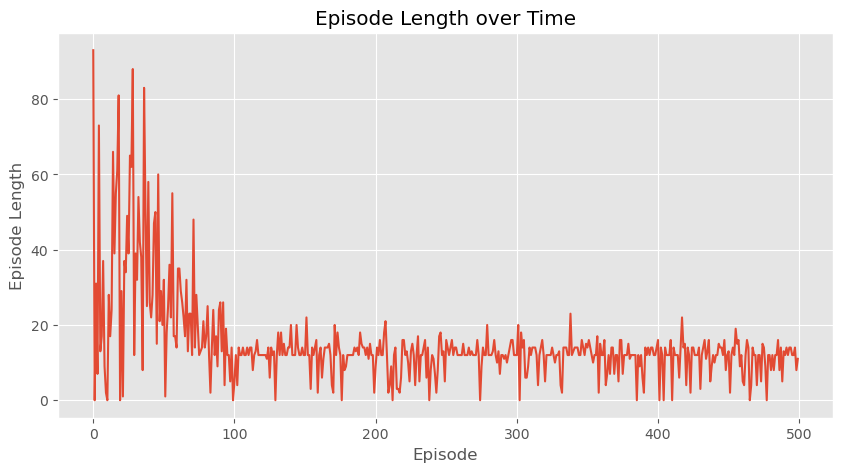

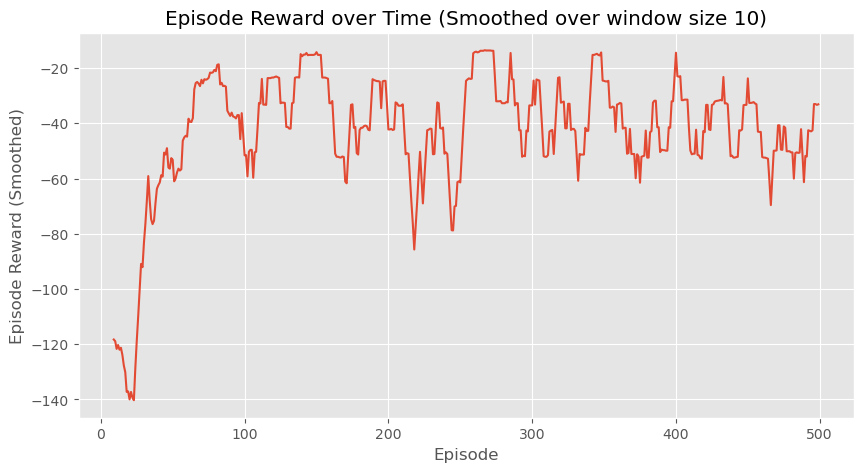

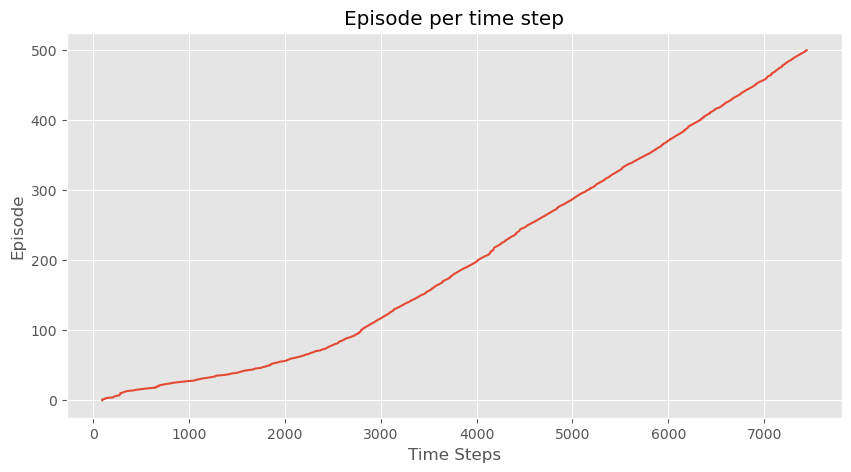

(<Figure size 1000x500 with 1 Axes>,
 <Figure size 1000x500 with 1 Axes>,
 <Figure size 1000x500 with 1 Axes>)

In [21]:
plotting.plot_episode_stats(stats)